### Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Import data and examine data

In [2]:
dataset = pd.read_csv('breast-cancer.csv',header=None)
dataset.columns = ['Class','Age','Menopause','Tumor_size','Inv_nodes','Node_caps','Deg_malig','Breast','Breast_quadr','Irradiat']

### Data Preprocessing

Check and drop sample with missing values

In [3]:
dataset

,Class,Age,Menopause,Tumor_size,Inv_nodes,Node_caps,Deg_malig,Breast,Breast_quadr,Irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [4]:
dataset=dataset[dataset['Node_caps']!='?']
dataset=dataset[dataset['Breast_quadr']!='?']

Mapping nominal and ordinal features

In [5]:
class_mapping = {'no-recurrence-events': 0,'recurrence-events': 1}
dataset['Class'] = dataset['Class'].map(class_mapping)

In [6]:
irradiat_mapping = {'no': 0,'yes': 1}
dataset['Irradiat'] = dataset['Irradiat'].map(irradiat_mapping)

In [7]:
node_caps_mapping = {'no': 0,'yes': 1}
dataset['Node_caps'] = dataset['Node_caps'].map(node_caps_mapping)

In [8]:
breast_mapping = {'left': 0,'right': 1}
dataset['Breast'] = dataset['Breast'].map(breast_mapping)

In [9]:
tumor_size_mapping = {'0-4': 0, '5-9': 1,'10-14': 2,'15-19': 3,'20-24': 4,'25-29': 5,'30-34': 6,
                      '35-39': 7,'40-44': 8,'45-49': 9,'50-54': 10,'55-59': 11}
dataset['Tumor_size'] = dataset['Tumor_size'].map(tumor_size_mapping)

In [10]:
inv_nodes_mapping = {'0-2': 0, '3-5': 1,'6-8': 2,'9-11': 3,'12-14': 4,'15-17': 5,'18-20': 6,
                      '21-23': 7,'24-26': 8,'27-29': 9,'30-32': 10,'33-35': 11,'36-39': 12} 
dataset['Inv_nodes'] = dataset['Inv_nodes'].map(inv_nodes_mapping)

In [11]:
age_mapping = {'10-19': 0,'20-29': 1,'30-39': 2,'40-49': 3,'50-59': 4,'60-69': 5,'70-79': 6,                       
                      '80-89': 7,'90-99': 8} 
dataset['Age'] = dataset['Age'].map(age_mapping)

In [12]:
menopause = pd.get_dummies(dataset['Menopause'])
dataset = pd.concat([dataset, menopause], axis=1)
dataset = dataset.drop(['Menopause'],axis=1)
dataset.rename(columns={'ge40': 'Meno_aft_40','lt40': 'Meno_bef_40','premeno': 'Premeno'},inplace=True)

In [13]:
breast_quadr = pd.get_dummies(dataset['Breast_quadr'])
dataset = pd.concat([dataset, breast_quadr], axis=1)
dataset = dataset.drop(['Breast_quadr'],axis=1)
dataset.rename(columns={'left_up': 'Left_up','left_low': 'Left_low','right_up': 'Right_low','central': 'Central'},inplace=True)

Recheck the data information

In [14]:
dataset.head()

,Class,Age,Tumor_size,Inv_nodes,Node_caps,Deg_malig,Breast,Irradiat,Meno_aft_40,Meno_bef_40,Premeno,Central,Left_low,Left_up,right_low,Right_low
0,0,2,6,0,0,3,0,0,0,0,1,0,1,0,0,0
1,0,3,4,0,0,2,1,0,0,0,1,0,0,0,0,1
2,0,3,4,0,0,2,0,0,0,0,1,0,1,0,0,0
3,0,5,3,0,0,2,1,0,1,0,0,0,0,1,0,0
4,0,3,0,0,0,2,1,0,0,0,1,0,0,0,1,0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 285
Data columns (total 16 columns):
Class          277 non-null int64
Age            277 non-null int64
Tumor_size     277 non-null int64
Inv_nodes      277 non-null int64
Node_caps      277 non-null int64
Deg_malig      277 non-null int64
Breast         277 non-null int64
Irradiat       277 non-null int64
Meno_aft_40    277 non-null uint8
Meno_bef_40    277 non-null uint8
Premeno        277 non-null uint8
Central        277 non-null uint8
Left_low       277 non-null uint8
Left_up        277 non-null uint8
right_low      277 non-null uint8
Right_low      277 non-null uint8
dtypes: int64(8), uint8(8)
memory usage: 21.6 KB


Train and Test split 

In [16]:
from sklearn.model_selection import train_test_split
X,y = dataset.iloc[:, 1:].values,dataset.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

### Logistic Regression and Metrics

Training and test ccuracy

In [17]:
"""To test the initial model performance"""
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(C=0.1,random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Training accuracy:',pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
print('ROC AUC: %.3f' % roc_auc_score(y_test,pipe_lr.predict_proba(X_test)[:,1]))

Training accuracy: 0.7616580310880829
Test Accuracy: 0.786
ROC AUC: 0.741


E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


K-fold cross-validation

In [18]:
"""To test the volatility of the accuracy score"""
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.9        0.65       0.55       0.75       0.75       0.75
 0.78947368 0.72222222 0.77777778 0.72222222]
CV accuracy: 0.736 +/- 0.086


E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was conv

Confusion matrix

E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


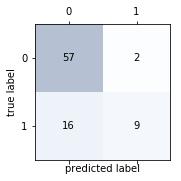

In [19]:
y_pred = pipe_lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [20]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.818
Recall: 0.360
F1: 0.500


### Assessing Feature Importance

Random Forests

 1) Tumor_size                     0.235454
 2) Deg_malig                      0.162452
 3) Age                            0.120624
 4) Inv_nodes                      0.117505
 5) Breast                         0.070266
 6) Node_caps                      0.043872
 7) Left_up                        0.043795
 8) Irradiat                       0.039861
 9) Left_low                       0.036111
10) Right_low                      0.032413
11) Premeno                        0.030579
12) Meno_aft_40                    0.027498
13) Central                        0.019176
14) right_low                      0.019044
15) Meno_bef_40                    0.001349


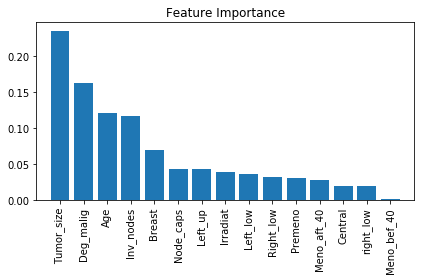

In [21]:
"""figure out the top risk factors in breast cancer recurrance by random forests"""
from sklearn.ensemble import RandomForestClassifier

feat_labels = dataset.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

Sequential Backward Selection

In [22]:
"""figure out the top risk factors in breast cancer recurrance by SBS"""
from sklearn.base import clone
from itertools import combinations

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


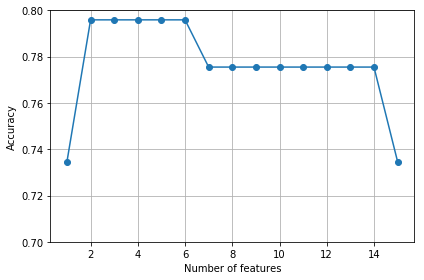

In [23]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
lr = LogisticRegression(C=0.1)
# selecting features
sbs = SBS(lr, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 0.8])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [24]:
# Select the best two and five features
k2 = list(sbs.subsets_[13])
k5 = list(sbs.subsets_[10])
print(dataset.columns[1:][k2])
print(dataset.columns[1:][k5])

Index(['Inv_nodes', 'Deg_malig'], dtype='object')
Index(['Age', 'Tumor_size', 'Inv_nodes', 'Node_caps', 'Deg_malig'], dtype='object')


- The most significant five features are Tumor_size, Deg_malig, Age, Inv_nodes and Node_caps.   Compared with the result of feature importance, only one feature differs in the top five features. 

Plot the region with two features

In [25]:
"""try to seperate the dataset with two most discriminative features generated by SBS and plot the result"""
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

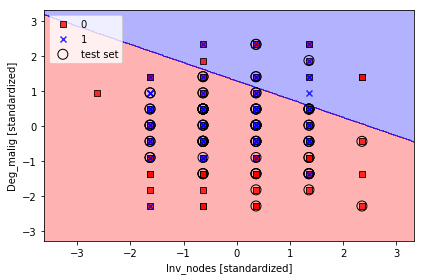

In [26]:
lr.fit(X_train_std[:, k2], y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(len(X_train_std), len(X_train_std)+len(X_test_std)))
plt.xlabel('Inv_nodes [standardized]')
plt.ylabel('Deg_malig [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

### Tuning hyperparameter with validation curves

E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was conv

E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was conv

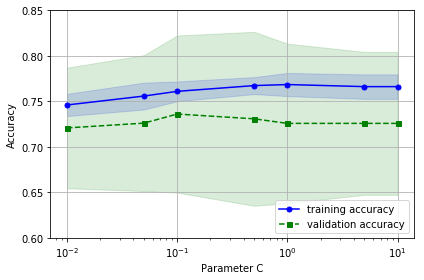

In [27]:
"""try to find the best C value through validation curves"""
from sklearn.model_selection import validation_curve

param_range = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.85])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

- From the picture above, we can find that when C equals 0.1(the default value I set in logistic regression), the test accuracy is the highest.

### Check the result with other algorithms

These algorithms are used to figure out whether the relatively low accuracy score of logistic regression above is due to the model itself or dataset. If all other algorithms generate similar level of accuracy score, it might mean that the low score results from the datasetitself. GridSearch is used in SVM and the hyperparameters in left algorithms are adjusted manually to get the highest test accuracy score because I can't figure out how to apply GridSearch to them.

Perceptron

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
pipe_ppn = make_pipeline(StandardScaler(), Perceptron(n_iter=38, eta0=0.1, random_state=1))
pipe_ppn.fit(X_train, y_train)
y_pred = pipe_ppn.predict(X_test)
print('Training accuracy:',pipe_ppn.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_ppn.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Training accuracy: 0.7409326424870466
Test Accuracy: 0.798
Precision: 0.750
Recall: 0.480
F1: 0.585


E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Support Vector Machines

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear']},
              {'svc__C': param_range,
               'svc__gamma': param_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

0.7512953367875648
{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Precision: 0.750
Recall: 0.480
F1: 0.585


E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Decision Tree

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
pipe_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1))
pipe_tree.fit(X_train, y_train)
y_pred = pipe_tree.predict(X_test)
print('Training accuracy:',pipe_tree.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_tree.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Training accuracy: 0.8808290155440415
Test Accuracy: 0.726
Precision: 0.556
Recall: 0.400
F1: 0.465


E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Random Forest 

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
pipe_forest = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini', n_estimators=40, n_jobs=3, random_state=1))
pipe_forest.fit(X_train, y_train)
y_pred = pipe_forest.predict(X_test)
print('Training accuracy:',pipe_forest.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_forest.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Training accuracy: 0.9844559585492227
Test Accuracy: 0.750
Precision: 0.611
Recall: 0.440
F1: 0.512


K-nearest neighbors

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski'))
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('Training accuracy:',pipe_knn.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))
print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Training accuracy: 0.7823834196891192
Test Accuracy: 0.726
Precision: 0.562
Recall: 0.360
F1: 0.439


E:\SoftWare\Python\Python\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


- The similar level test accuracy scores in other algorithms suggests that dataset might be the reason why accuracy score is a little low in original model,or the logistic regression.

### Conclusion

- Tumor_size, Deg_malig, Age, Inv-nodes are the top four discriminative features, which can also be regarded as the risk factors for breast cancer recurrence.
- The best suitable value of hyperparameter C in logistic regression seems be 0.1 in this model.
- The predictive power of the logistic regression model seems not good enough.
- Small sample size reduces the generalization performance of the model
- Compared with other algorithms, logistic regression shows no significant disadvantage in test accuracy.